In [1]:
#Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
comments = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/1-Youtube Text Data Analysis/GBcomments.csv', error_bad_lines=False) 

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [3]:
comments.head() 

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


In [4]:
#Performing sentiment analysis, i.e, figuring the good and bad comments

In [5]:
from textblob import TextBlob #Installing and importing textblob

In [6]:
TextBlob('Its more accurate to call it the M+ (1000) be...').sentiment.polarity

0.45000000000000007

In [7]:
comments.isnull().sum() 

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [8]:
comments.dropna(inplace=True)

In [9]:
polarity = []
for i in comments['comment_text']:
  polarity.append(TextBlob(i).sentiment.polarity)

In [90]:
comments['polarity'] = polarity

In [12]:
#EDA on good and bad comments 

In [13]:
positive_comments = comments[comments['polarity'] == 1] 

In [14]:
positive_comments.shape

(20400, 5)

In [15]:
positive_comments.head(5)

,video_id,comment_text,likes,replies,polarity
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.0
26,jt2OHQh0HoQ,The best thing to ever happen to iPhone,0,2,1.0
80,jt2OHQh0HoQ,Apple is always awesome \n\nhttps://youtu.be/r...,0,1,1.0
158,YPVcg45W0z4,das a lot of edditing you have done there ... ...,0,0,1.0
175,YPVcg45W0z4,Welcome to the Scandiworld!,0,0,1.0


In [17]:
from wordcloud import WordCloud, STOPWORDS

In [18]:
stopwords = set(STOPWORDS)

In [19]:
total = ''.join(positive_comments['comment_text'])

In [20]:
wordcloud = WordCloud(width=1000, height=500, stopwords=stopwords).generate(total)

(-0.5, 999.5, 499.5, -0.5)

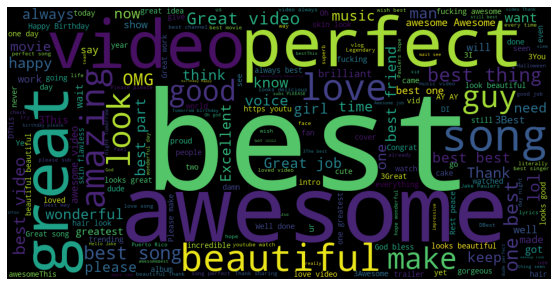

In [21]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [22]:
negative_comments = comments[comments['polarity'] == -1]

In [23]:
total = ''.join(negative_comments['comment_text'])

In [24]:
wordcloud = WordCloud(width=1000, height=500, stopwords=stopwords).generate(total)

(-0.5, 999.5, 499.5, -0.5)

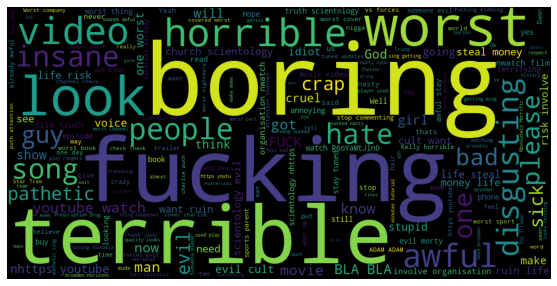

In [25]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [91]:
#Looking at tags 

In [27]:
videos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/1-Youtube Text Data Analysis/USvideos.csv', error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [28]:
videos.head(5)

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [29]:
tags_videos =''.join(videos['tags'])

In [30]:
tags_videos

"logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 lifeApple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|Face ID|Apple Pay|camera|smartphone[none]apple iphone x hands on|Apple iPhone X|iPhone X|apple iphone x first look|iPhone X first look|apple iphone x event 2017|apple iphone x event|iPhone X price|iPhone X specs|iPhone X design|iPhone X camera|iPhone X home button|iPhone X wireless charging|iPhone X waterproof|iPhone X release date|iphone 2017|apple|iphone|ios 11|the verge|vergejacksfilms|parody|parodies|iphone|iphone x|iphone 8|apple|emojia24|a24 films|a24 trailers|independent films|trailer|HD|official|movie|film|a24 movies|oscar winne

In [31]:
#Likes and Dislikes analysis with views and correlation

Text(0.5, 1.0, 'Regression plot for views and likes')

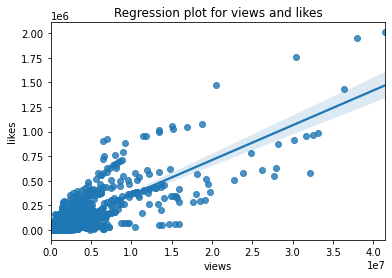

In [38]:
sns.regplot(data=videos,x='views',y='likes')
plt.title('Regression plot for views and likes') #Views increase and Likes increase

Text(0.5, 1.0, 'Regression plot for views and dislikes')

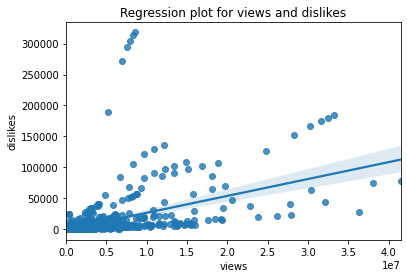

In [39]:
sns.regplot(data=videos,x='views',y='dislikes')
plt.title('Regression plot for views and dislikes') #Views increasing and dislikes decreasing

In [40]:
df_corr= videos[['views','likes','dislikes']]

In [43]:
df_corr.corr()

,views,likes,dislikes
views,1.000000,0.832844,0.541955
likes,0.832844,1.000000,0.497439
dislikes,0.541955,0.497439,1.000000


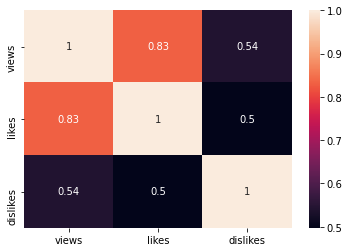

In [45]:
sns.heatmap(df_corr.corr(), annot=True) #Views v/s likes have highest correlation

In [46]:
#EDA on Emojis 

In [47]:
comments.head()

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.45
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.00
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.00
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.00
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.00


In [49]:
comments['comment_text'][1]

'To be there with a samsung phone\\n😂😂😂'

In [50]:
print('\U0001F600')

😀


In [63]:
import emoji

In [53]:
len(comments)

718424

In [57]:
comment = comments['comment_text'][1]

In [68]:
[c for c in comment if c in emoji.UNICODE_EMOJI_ALIAS_ENGLISH]

['😂', '😂', '😂']

In [70]:
str = ''
for i in comments['comment_text']:
  list = [c for c in i if c in emoji.UNICODE_EMOJI_ALIAS_ENGLISH]
  for element in list:
    str=str+element

In [71]:
len(str)

341870

In [72]:
str

'😂😂😂😭😭😭😢😢😢❤❤😂👏👇👇👇👇👇👇👇👇👇👇🌞😎😣😥😫😭✌😂👎🏻👎🏻👎🏻👎🏻😂🖕😘😘▶⏭⏮◀🔥🔥😊😊🤔🤔😂😂😂😂👏🏻👏🏻❤❤😜😍😍😅❤😍😍✌😂😂😂😊😂😂😂😂😏😏🇪🇸😭💔😊❤❤❤❤❤😂😂😊❤😂🤣✨🌈😘😂😂❤😊😂😊😂💗😂😊😊😊💖🐢😉😍😂😂💗💗😻😻❤😂😂❤❤🤗👌🏼👌🏼😂😂😂😂💖😩🙊♥♥♥😂😂😂💙💙💙💙💙💙😂😂😂❤❤❤😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😱😊😛🌳🌽🎃🚣🚂😂😂😊😕😋🤣😅😢💔😂😊🤡🙏🙏🙏👊🏿🙇🏽👋😅😅😅😅😂😂🤔😎😎😎😎😎😎😎😍😍😍😍😍😍😘😘😘😘😘😘😘😲🖕💪🤘💓☺☺😂😂😂💕😄😄😍💕😉😩❤❤💕❤😂💕😍💗👫💖😆💕💖💕😍😍😊😄😍😀💗🦄😍😊😂😊👍😍♥❤😂👶🏻🤗☺😘💙💙💙😍😍😊😎🤘🖤👌👌😍😂👌🍍😎😎😄😄😄😄😂😂😂😬💜💜💜😭😂😍😍💖😂😂😂😂😂😂😂😭😂😭😂😭😂😂😂😍😍😍😭😍😍😂👀👀🤔😂😂😂😂😂😂😂😂😂😂🍸🍸🍸🍸🍸😂😂😂🤣🤣🤣😂😂😂😂😍💜💜💜💜😂😂😂😅😂😍💖😂😻😉🔥❤😻❤😭😭😭😭😭😭😭👍🏻😍💚💙❤❤😫❤❤❤❤❤♥😍❤😊😍😎💄🐐😅😂😂😊😊👀👌🏽❤❤❤😂💖🎉💪💪🏽😎🙌🙌😜❤❤💛💛😎🙏💚🎉🎉❤🎉🎉🎉🎉🎊🎉🎊🎉😭💗😍😍😍😍😍😍😍👏✌😁❤❤😂💋💋👫💘😻💋💋😂👑🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥😂😐😑😩👌🏻🔥💖👏🏻👀✨👅💦💕❤😍🔥🔥🔥❤❤❤❤❤❤❤👌😍😍😍😞🌴💜💜💜💜😍😍😍😍😍❤❤❤❤❤😊❤❤❤❤🍔🍟🇺🇸😒🌿😄😄😄😉🍲🍱🎏❤💪👊🏽😘😂😂😂❤🙋☺😍😍😚💕😉😂❤❤😊☺💓🌸🙄🙄🙄🙁😞😊🙄😍😨😍😍😍😍😎😃😂😍😏😌😂😎🤑😂😉👍🏻🔥💯🚨😊☺😂😂😂🤣🙂❤❤😀😀😀♥♥😂❤😂😓😭😂❤❤😖😖😂😂😂💗💝😘💐💐💐😂😍☺😂❤😭💕🙌🏽🙌🏽🙌🏽😘😘❤❤💖😫😖📱😂😏🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗😁🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗😎😂😂👍🏼💯💕♥♥♥😱😱😱❤❤❤😍😍😩😩😩😩😩😩😩😍😻😻😻😻😻😳🥀♥♥♥♥♥♥😍😍😍🙃😂💕💕💕😍💕💕❤❤💕😍🍫🌹💖🇸🇸🇸🇸❤😍👸🏿👸🏿👸🏿👸🏿👸🏿💗😊😊😩❤👌🏼😻😊😍❤😂😂👏🏼❤❤❤❤❤😍😍😍💚💚💚💚💚😍😭🌹😍❤😍😍😍💚💚💚💚💚😍💚💚💚☺💙😀😍💚😕😍👌😂😂😂😍👌🏻💗❤💚💚💚😸😙😙😘💚💚💚💚😍😭😭💖💓💓💓😍❤😘😘🤗🤗🤗❤😀😀💓💓💓❤😂❤😍❤❤♥♥♥❤🙌❤😂❤❤😍❤💜😍😭😍😍😍😊💗💕😍❤💗💗💛💛💛💖💖😍😐😍😍😍😍🗿😂🤗😩😩😩💖💖💖❤❤❤❤❤😍😍✨😍👍🏻😁😂😍💅❤😘❤❤😈👀😄😈👍☝👆✊👌✌👊✋👋👏👐👉👈💔😂😂😬😭😥☺😂😂😂😂😍😍😍😜😂😂😂😂😂😒👎🏽😱😱😱😱😂😎😛🙊✊✌😑😑😑👌😊

In [74]:
output = {}
for i in set(str):
  output[i] = str.count(i)


In [75]:
output

{'⚒': 5,
 '🈶': 18,
 '🐕': 192,
 '🍕': 111,
 '🔗': 7,
 '🥄': 3,
 '🥗': 7,
 '😑': 457,
 '♊': 9,
 '🥇': 41,
 '🏷': 4,
 '☎': 14,
 '🚗': 27,
 '📡': 9,
 '👀': 596,
 '⏯': 4,
 '👥': 13,
 '🌯': 74,
 '🍏': 20,
 '🥂': 33,
 '🔸': 88,
 '⏸': 4,
 '🗺': 14,
 '🧐': 3,
 '⛏': 5,
 '🍩': 76,
 '🕞': 7,
 '⛔': 14,
 '🙋': 430,
 '🚼': 17,
 '🇼': 26,
 '⭐': 281,
 '🏵': 28,
 '🛬': 4,
 '💩': 638,
 '🤘': 731,
 '🌚': 59,
 '🌒': 18,
 '🚝': 7,
 '🧠': 1,
 '🎻': 30,
 '🏁': 38,
 '👚': 27,
 '🚣': 7,
 '🙀': 79,
 '🌸': 324,
 '🦐': 4,
 '🏺': 8,
 '🐨': 39,
 '🐡': 23,
 '😾': 30,
 '🍰': 89,
 '🕣': 7,
 '🕕': 8,
 '⛅': 18,
 '🚾': 6,
 '📵': 6,
 '💅': 166,
 '🌨': 13,
 '🌵': 42,
 '🏧': 6,
 '🧞': 6,
 '🌱': 35,
 '🌝': 53,
 '🈺': 16,
 '🏠': 42,
 '💡': 63,
 '💬': 14,
 '😦': 109,
 '🚦': 6,
 '🆚': 16,
 '🔤': 5,
 '🐷': 43,
 '📄': 9,
 '🔟': 10,
 '🗓': 4,
 'Ⓜ': 5,
 '🕢': 8,
 '🎫': 14,
 '☄': 23,
 '🕠': 7,
 '🗒': 5,
 '🏐': 6,
 '👬': 47,
 '🌴': 58,
 '💏': 65,
 '🕗': 7,
 '⛪': 29,
 '⬛': 153,
 '🍣': 54,
 '🇰': 128,
 '😫': 782,
 '🇿': 52,
 '🥑': 13,
 '🚜': 41,
 '📚': 39,
 '🤒': 43,
 '🔥': 10249,
 '😙': 1139,
 '🤭': 16,
 '💂': 18,
 '🌳':

In [93]:
df = pd.DataFrame({'chars':keys[-20:], 'num':values[-20]})

In [86]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [87]:
trace = go.Bar(x=df['chars'], y=df['num'])
iplot([trace])